In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import random_split, TensorDataset, DataLoader
import matplotlib.pyplot as plt
from pathlib import Path
import sys


# climb up to the repo root and add <repo>/src to Python's path
repo_root = Path().resolve().parents[0]   # parent of "notebooks"
sys.path.insert(0, str(repo_root / "src"))

from fisher_information.fim import FisherInformationMatrix
from models.conv_models import ConvModelMNIST
from models.train_test import *

device = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
mnist_train = torchvision.datasets.MNIST(root='../data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='../data', train=False, download=True, transform=torchvision.transforms.ToTensor())

mnist_train_loader = DataLoader(mnist_train, batch_size = 256, shuffle=True)
mnist_train_fim_loader = DataLoader(mnist_train, batch_size = 1, shuffle=True) 
mnist_test_loader = DataLoader(mnist_test, batch_size = 20, shuffle=True)

In [3]:
model = ConvModelMNIST().to(device)
learning_rate = 1e-2
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()
epochs = 30
verbose = True
use_scheduler = False

model, loss_list = train(model, criterion, optimizer, mnist_train_loader, epochs, verbose=verbose,  use_scheduler= use_scheduler)

Epoch 1/30- Loss: 0.16637463867664337
Epoch 6/30- Loss: 0.018185477703809738
Epoch 11/30- Loss: 0.04755106940865517
Epoch 16/30- Loss: 0.09743434190750122
Epoch 21/30- Loss: 0.030616549775004387
Epoch 26/30- Loss: 0.0036030251067131758


In [4]:
acc_full = test(model, mnist_test_loader)
print(f"Test accuracy (full model): {acc_full:.2f}")

Test accuracy (full model): 0.99


In [5]:
fim = FisherInformationMatrix(model, criterion, optimizer)
fim.compute_fim(mnist_train_fim_loader)

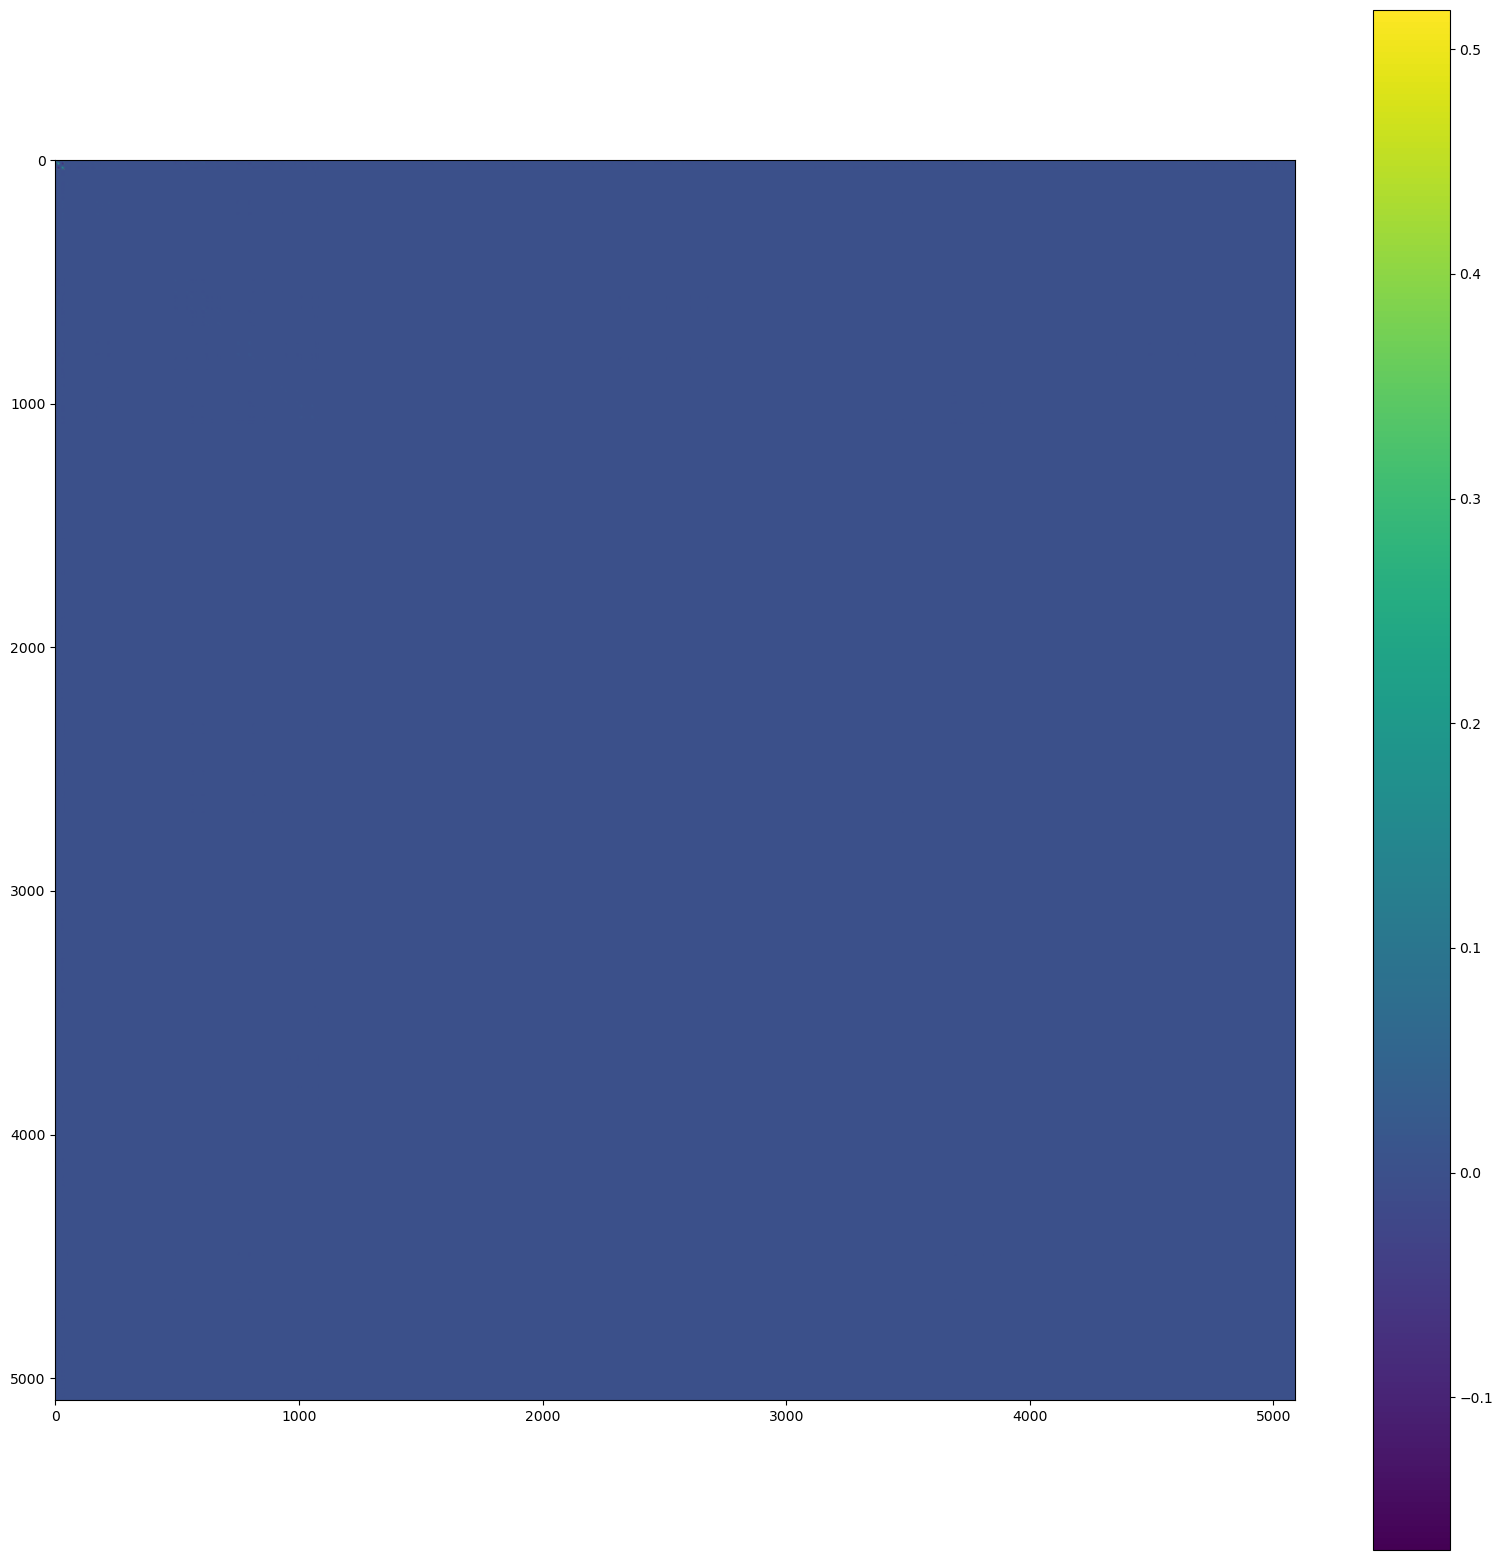

In [12]:
fig, ax = plt.subplots(1,1, figsize=(20,20))
img = ax.imshow(fim.fim['complete'].cpu().numpy())
cbar = fig.colorbar(img, ax=ax, orientation='vertical')
plt.show()

In [7]:
fim.compute_logdet_metrics()
print(fim.logdet)
print(fim.diaglogdet)
print(fim.logdet_ratio)

-77220.765625
-56914.75
-20306.015625
